In [ ]:
import os
import sys
import torch

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

if os.path.abspath("../../") not in sys.path:
    sys.path.append(os.path.abspath("../../"))

from building_gan.src.config import Configuration
from building_gan.src.data import GraphDataLoaders
from building_gan.src.models import VoxelGNNGenerator, VoxelGNNDiscriminator
from building_gan.src.trainer import Trainer

configuration = Configuration()
configuration.set_seed()

configuration.EPOCHS = 606

dataloaders = GraphDataLoaders(configuration=configuration)
generator = VoxelGNNGenerator(configuration)
discriminator = VoxelGNNDiscriminator(configuration)

optimizer_generator = torch.optim.AdamW(generator.parameters(), lr=configuration.LEARNING_RATE_GENERATOR)
optimizer_discriminator = torch.optim.AdamW(discriminator.parameters(), lr=configuration.LEARNING_RATE_DISCRIMINATOR)
scheduler_generator = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_generator, T_max=configuration.EPOCHS)

trainer = Trainer(
    generator=generator,
    discriminator=discriminator,
    dataloaders=dataloaders,
    optimizer_generator=optimizer_generator,
    optimizer_discriminator=optimizer_discriminator,
    scheduler_generator=scheduler_generator,
    configuration=configuration,
    # log_dir=os.path.join(configuration.LOG_DIR, "base")
)

trainer.train()

In [ ]:
!tensorboard --logdir=building_gan/runs/base

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.16.2 at http://localhost:6007/ (Press CTRL+C to quit)


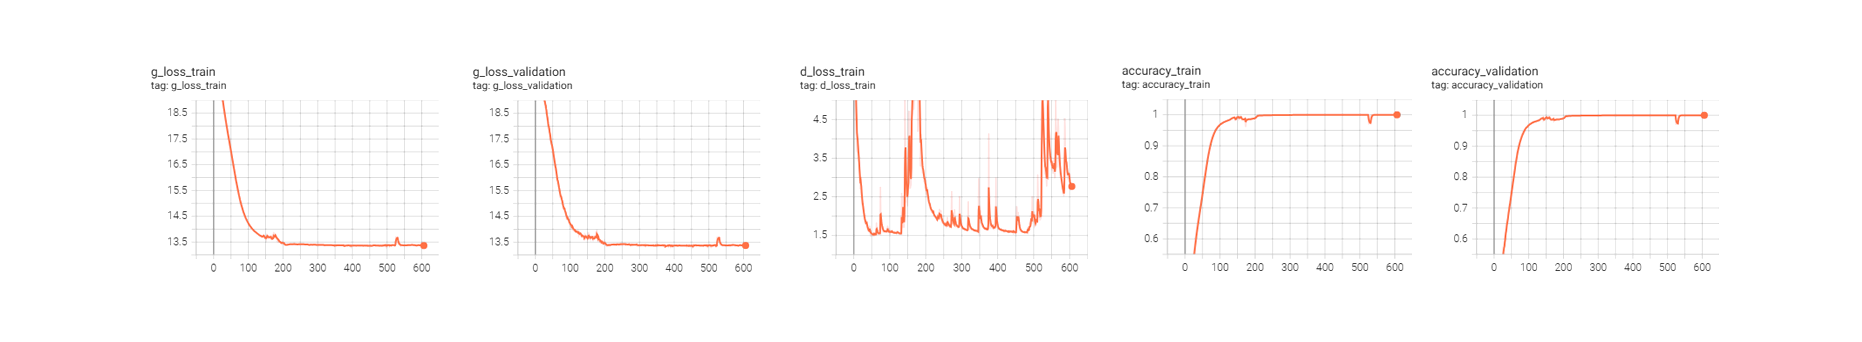

In [2]:
from IPython.display import Image, display

display(Image('../assets/base-scalars.png'))

The function evaluate_qualitatively took 105.45206427574158 seconds to run.


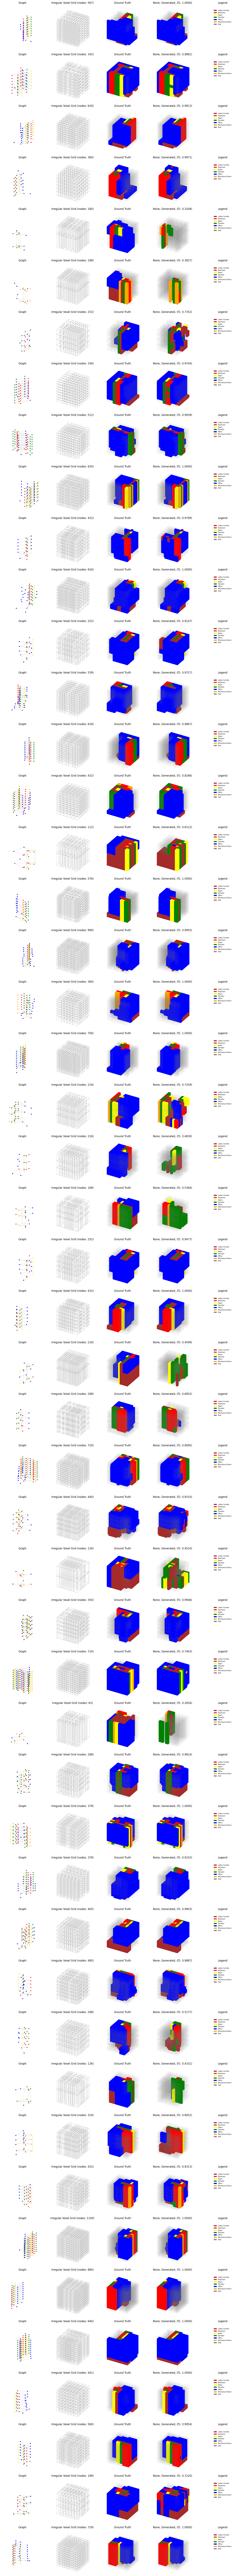

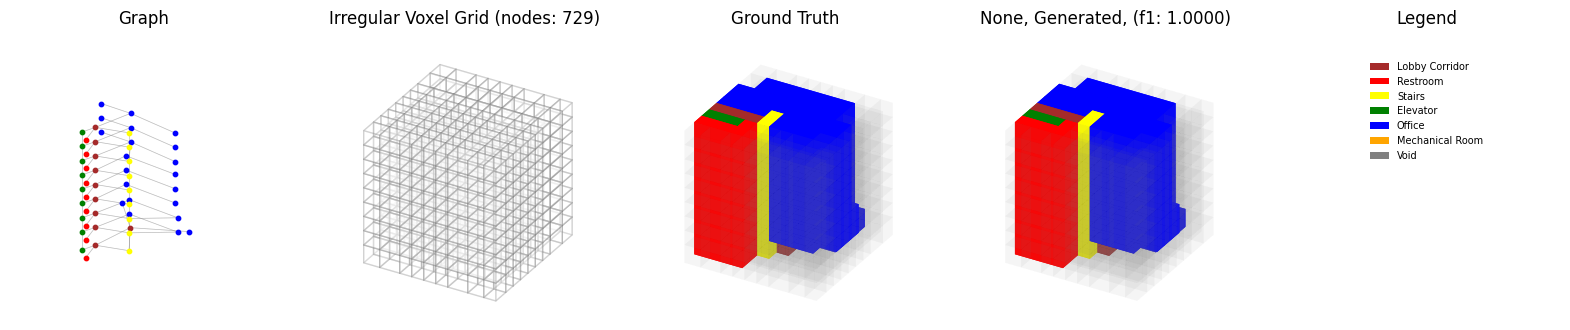

In [ ]:
import os
import sys
import torch
from IPython.display import clear_output

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

if os.path.abspath("../../") not in sys.path:
    sys.path.append(os.path.abspath("../../"))

from building_gan.src.config import Configuration
from building_gan.src.data import GraphDataLoaders
from building_gan.src.models import VoxelGNNGenerator, VoxelGNNDiscriminator
from building_gan.src.trainer import Trainer

configuration = Configuration()

dataloaders = GraphDataLoaders(configuration=configuration)

_local_graph, _voxel_graph = dataloaders.train_dataloader.dataset[0]

generator = VoxelGNNGenerator(
    configuration=configuration, 
    local_graph_dim=_local_graph.x.shape[1], 
    voxel_graph_dim=_voxel_graph.x.shape[1]
)

discriminator = VoxelGNNDiscriminator(
    configuration=configuration, 
    local_graph_dim=_local_graph.x.shape[1], 
    voxel_graph_dim=_voxel_graph.x.shape[1]
)

optimizer_generator = torch.optim.AdamW(generator.parameters(), lr=configuration.LEARNING_RATE_GENERATOR)
optimizer_discriminator = torch.optim.AdamW(discriminator.parameters(), lr=configuration.LEARNING_RATE_DISCRIMINATOR)
scheduler_generator = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_generator, T_max=configuration.EPOCHS)

trainer = Trainer(
    generator=generator,
    discriminator=discriminator,
    dataloaders=dataloaders,
    optimizer_generator=optimizer_generator,
    optimizer_discriminator=optimizer_discriminator,
    scheduler_generator=scheduler_generator,
    configuration=configuration,
    log_dir=os.path.join(configuration.LOG_DIR, "lambda01")
)

clear_output()

trainer.evaluate_qualitatively(
    epoch=None, 
    num_samples=len(dataloaders.test_dataloader.dataset) // 20, 
    to_tensor=False, 
    use_test_dataset=True
)